# Lab 2: Text Data Visualization

Objectives:
- To gain more practice in exploring and pre-processing text data.
- To create visualization for the textual data using the techniques introduced in class.

65070501037<br>
Paweekorn Soratyathorn

***

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Download the data (UN General Debate)

In [2]:
# !wget https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/193c79c7d94973f2398e67da8d20bf7a535f7f40/data/un-general-debates/un-general-debates-blueprint.csv.gz

Read the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/193c79c7d94973f2398e67da8d20bf7a535f7f40/data/un-general-debates/un-general-debates-blueprint.csv.gz', 
                 compression='gzip')
df

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...


## EDA - Explore more about this dataset

Add new column which presents length of the text

In [5]:
df['length'] = df['text'].str.len()
df

,session,year,country,country_name,speaker,position,text,length
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911
...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,10568
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,25430
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,13662
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,14247


List all columns in this dataset

In [6]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text', 'length'],
      dtype='object')

Types of data for each column

In [7]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
length           int64
dtype: object

All information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
 7   length        7507 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 469.3+ KB


For all integer-typed columns, find out their stats

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


Investigate: Any missing data?

In [10]:
# Missing data
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

Address the missing data in the column "speaker" by replacing those missing values with 'unknown'.

In [11]:
df['speaker'].fillna('unknown',inplace=True)
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker            0
position        3005
text               0
length             0
dtype: int64

Find out all unique speakers in this dataset.

In [12]:
pd.unique(df['speaker'])

array(['Mr. NAS', 'Mr. DE PABLO PARDO', 'Mr. McMAHON', ...,
       'Mr. Abdrabuh Mansour Hadi Mansour', 'Mr. Tomislav Nikolić',
       'Mr. Edgar Chagwa Lungu'], dtype=object)

In [13]:
len(pd.unique(df['speaker']))

5429

Filter only records of which the speaker is President 'Bush'.

In [14]:
df[df['speaker'].str.contains('Bush')]

,session,year,country,country_name,speaker,position,text,length
2720,44,1989,USA,United States,Bush,President,﻿I am honoured to address the General Assembly...,19779
3038,46,1991,USA,United States,George Bush,President,﻿I am honoured to speak with you as you open t...,15555
4814,56,2001,USA,United States,George W. Bush,President,﻿We meet in a Hall devoted to\npeace; in a cit...,14724
5002,57,2002,USA,United States,Mr. George W. Bush,President,﻿We meet one year and one day\nafter a terrori...,16684
5191,58,2003,USA,United States,George W. Bush,President,"﻿Twenty-four months ago, and\nyesterday in the...",16962
5382,59,2004,USA,United States,Mr. George W Bush,President,Thank you for the honour of\naddressing the Ge...,18628
5760,61,2006,USA,United States,Mr. George W. Bush,President,I am grateful for the privilege of \nspeaking ...,16675
5951,62,2007,USA,United States,George W. Bush,President,Thank you for the opportunity \nto address the...,15483
6143,63,2008,USA,United States,George W. Bush,President,I am pleased to be here to \naddress the Gener...,18384


Select text from a particular row

In [15]:
temp = df[df['speaker'].str.contains('Bush')]
temp.iloc[[2]].text.values


array(['\ufeffWe meet in a Hall devoted to\npeace; in a city scarred by violence; in a nation\nawakened to danger; in a world uniting for a long\nstruggle. Every civilized nation here today is resolved\nto keep the most basic commitment of civilization. We\nwill defend ourselves and our future against terror and\nlawless violence.\nThe United Nations was founded in this cause. In\nthe Second World War, we learned that there is no\nisolation from evil. We affirmed that some crimes are\nso terrible they offend humanity itself, and we resolved\nthat the aggressions and ambitions of the wicked must\nbe opposed early, decisively and collectively, before\nthey threaten us all.\nThat evil has returned, and that cause is renewed.\nA few miles from here, many thousands still lie in a\ntomb of rubble. Tomorrow, the Secretary-General, the\nPresident of the General Assembly and I will visit that\nsite, where the names of every nation and region that\nlost citizens will be read aloud. If we were to

## Tasks

Select 3 speeches from different people and perform the following:
- Pre-process each speech using techniques taught in class
- Find top 10 words
- Select proper text visualization technique (at least 2 techniques) to gain more insights about the speech
- Briefly describe the insights you gain from the visualizations that you create

### Preprocessing
1. tokenizer

In [16]:
from nltk.tokenize import word_tokenize

people = ['Teodoro Obiang Nguema Mbasogo', 'Kenny D. Anthony', 'Prince Norodom Sirivudh']
filter_df = df[ df['speaker'].isin(people) ]
speeches_df = filter_df.copy().groupby('speaker').head(1)  # filter only 1 speech from each speaker

speeches_df['tokens'] = [word_tokenize(text) for text in speeches_df['text']]
speeches_df

,session,year,country,country_name,speaker,position,text,length,tokens
3479,49,1994,KHM,Cambodia,Prince Norodom Sirivudh,Deputy Prime Minister,On this solemn occasion allow me first to\ncon...,12705,"[On, this, solemn, occasion, allow, me, first,..."
4015,52,1997,LCA,Saint Lucia,Kenny D. Anthony,Prime Minister,﻿My delegation welcomes\nthe experience and ex...,19785,"[﻿My, delegation, welcomes, the, experience, a..."
4343,54,1999,GNQ,Equatorial Guinea,Teodoro Obiang Nguema Mbasogo,President,"At the outset, we would like to congratulate y...",15087,"[At, the, outset, ,, we, would, like, to, cong..."


2. stop-words removal

In [17]:
from nltk.corpus import stopwords

speeches = list(speeches_df['tokens'])
stop_words = stopwords.words('english')
filtered_speech = [ [], [], [] ]

for ind, word_list in enumerate(speeches):
    filtered_speech[ind] = [words for words in word_list if words.lower() not in stop_words]
    print(filtered_speech[ind].__contains__(stop_words))

False
False
False


3. lemmatization/ stemming

In [18]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
speech_1 = filtered_speech[0]
speech_2 = filtered_speech[1]
speech_3 = filtered_speech[2]

for speech in [speech_1, speech_2, speech_3]:
    for word in speech:
        temp = []
        temp.append(lemmatizer.lemmatize(word))
        
    speech = temp

4. Special Characters/ Punctuation

In [19]:
import re

def filter_alphanumeric(speech):
    full_speech = ' '.join(speech)
    text_prep = re.sub(r'[^a-zA-Z0-9\s]', '', full_speech)
    return text_prep
    
    
cleaned_speech_1 = filter_alphanumeric(speech_1)
cleaned_speech_2 = filter_alphanumeric(speech_2)
cleaned_speech_3 = filter_alphanumeric(speech_3)

### Text Analysis
<b>1. Prince Norodom Sirivudh</b>
- Find top 10 words

In [20]:
def calculate_word_frequencies(words):
    # Calculate word frequencies
    word_freq = {}
    for word in words:
        word_freq[word] = word_freq.get(word, 0) + 1
    return word_freq

# Tokenize the text
def top10_words(speech):
    words = word_tokenize(speech)
    filtered_sentence = []
    
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)

    # Calculate word frequencies
    word_freq = calculate_word_frequencies(filtered_sentence)

    # Convert word frequencies to a DataFrame for seaborn
    data = {'Word': list(word_freq.keys()), 'Frequency': list(word_freq.values())}
    df_word_freq = pd.DataFrame(data)

    # Sort DataFrame by frequency in descending order
    df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)
    return df_word_freq.head(10)


top10_words(cleaned_speech_1)

,Word,Frequency
66,Cambodia,33
13,United,25
14,Nations,22
102,people,15
35,peace,12
131,development,10
34,country,9
27,also,9
61,world,8
145,countries,7


- Text Visualization

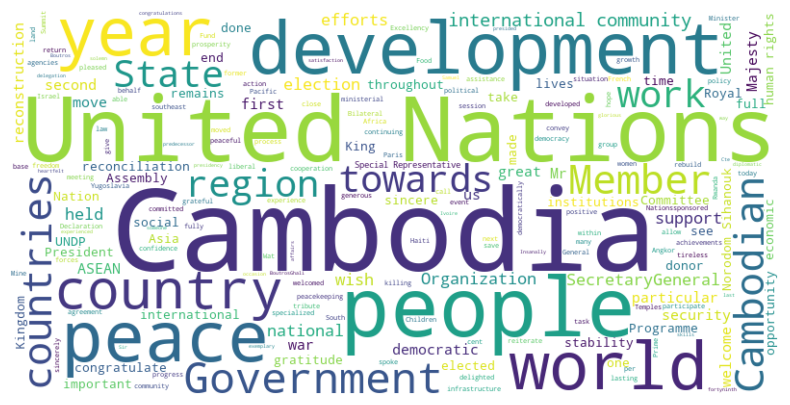

In [21]:
from wordcloud import WordCloud

def wordcloud_plot(speech):
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(speech)

    # Display the generated word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    
wordcloud_plot(cleaned_speech_1)

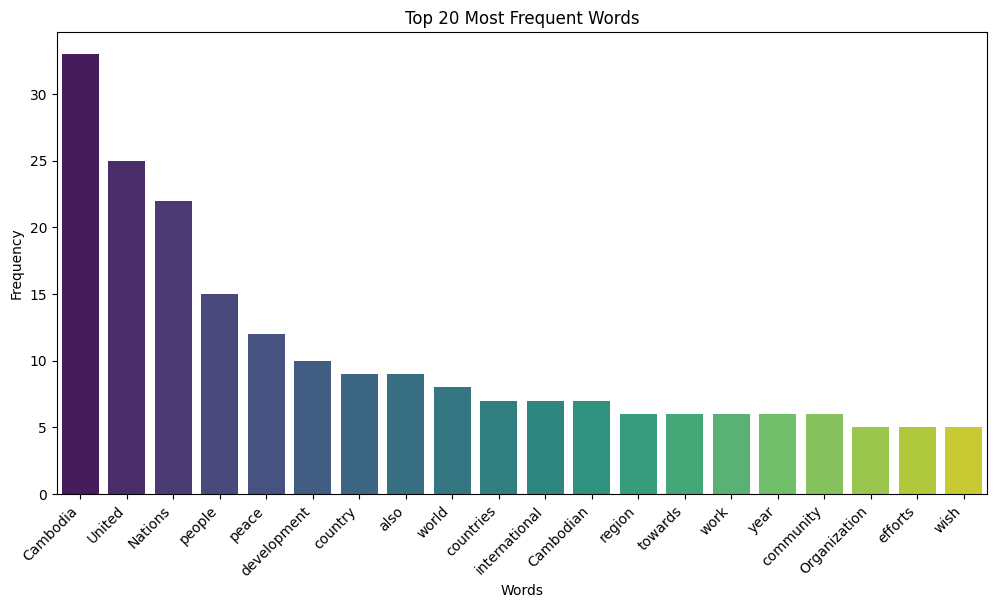

In [22]:
from nltk.probability import FreqDist

def frequency_plot(speech):
    # tokenize
    words = word_tokenize(speech)

    # Calculate word frequencies
    word_freq = FreqDist(words)

    # Convert word frequencies to a DataFrame for seaborn
    data = {'Word': list(word_freq.keys()), 'Frequency': list(word_freq.values())}
    df_word_freq = pd.DataFrame(data)

    # Sort DataFrame by frequency in descending order
    df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)

    # Plot a bar chart using seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Word', y='Frequency', data=df_word_freq.head(20), palette='viridis', hue='Word')
    plt.title('Top 20 Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()
    

frequency_plot(cleaned_speech_1)

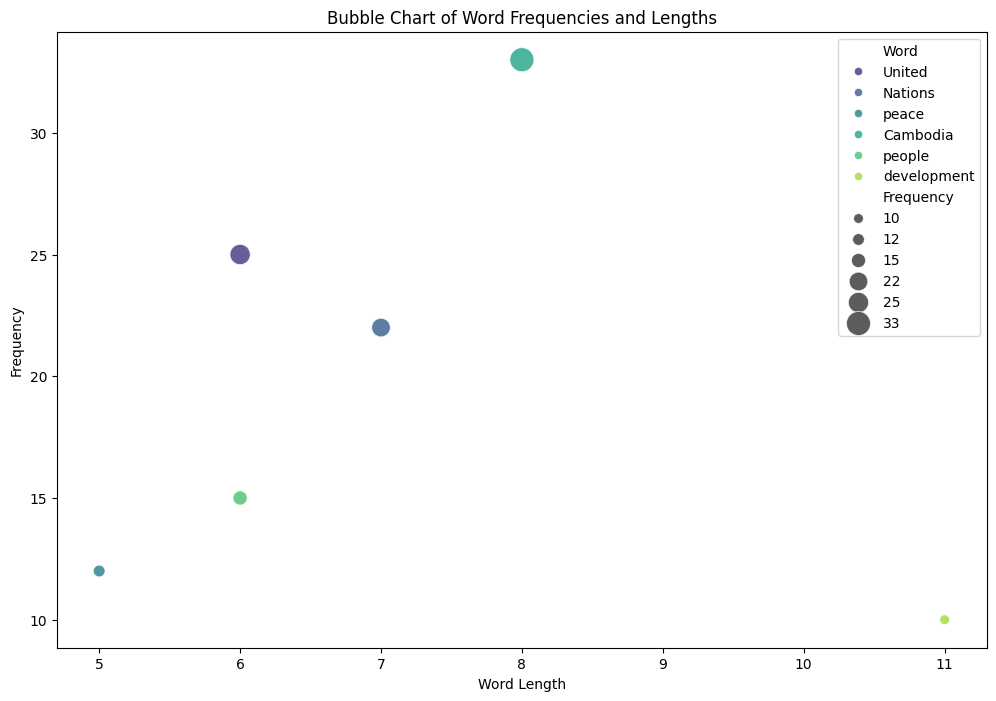

In [23]:
# Tokenize the text into words
words = word_tokenize(cleaned_speech_1)

# Calculate word frequencies
word_freq = FreqDist(words)

# Create a DataFrame with word frequencies and lengths
data = {'Word': list(word_freq.keys()), 'Frequency': list(word_freq.values()), 'Length': [len(word) for word in word_freq.keys()]}
df_word_data = pd.DataFrame(data)

# Filter out words with frequency less than 2 for better visualization
df_word_data = df_word_data[df_word_data['Frequency'] >= 10]

# Plot a bubble chart using seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Length', y='Frequency', size='Frequency', data=df_word_data, hue='Word', sizes=(50, 300), palette='viridis', alpha=0.8)
plt.title('Bubble Chart of Word Frequencies and Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

<b>Insight</b>

Prince Norodom Sirivudh is related with Cambodia and we can imply from charts and word frequency that he is the person who has responsible with peace and development of Cambodia. After I researched about his profile, I found that he is a Cambodian politician.

<b>2. Kenny D. Anthony</b>
- Find top 10

In [24]:
top10_words(cleaned_speech_2)

,Word,Frequency
33,United,26
133,must,24
177,States,22
34,Nations,21
225,international,18
157,Saint,17
158,Lucia,17
31,new,16
61,small,15
286,WTO,14


- Text Visualization

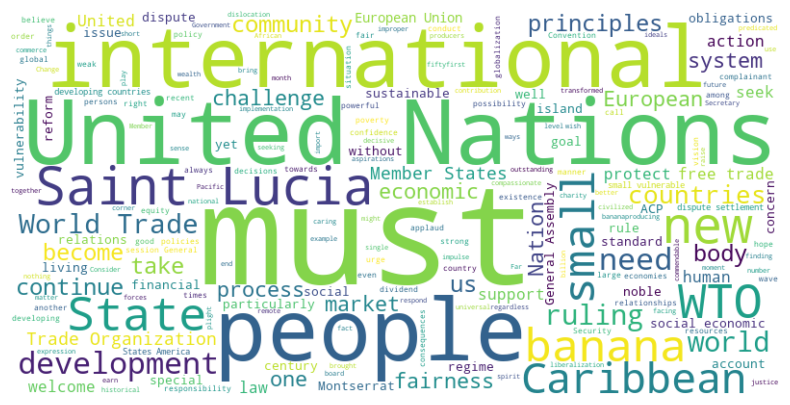

In [25]:
wordcloud_plot(cleaned_speech_2)

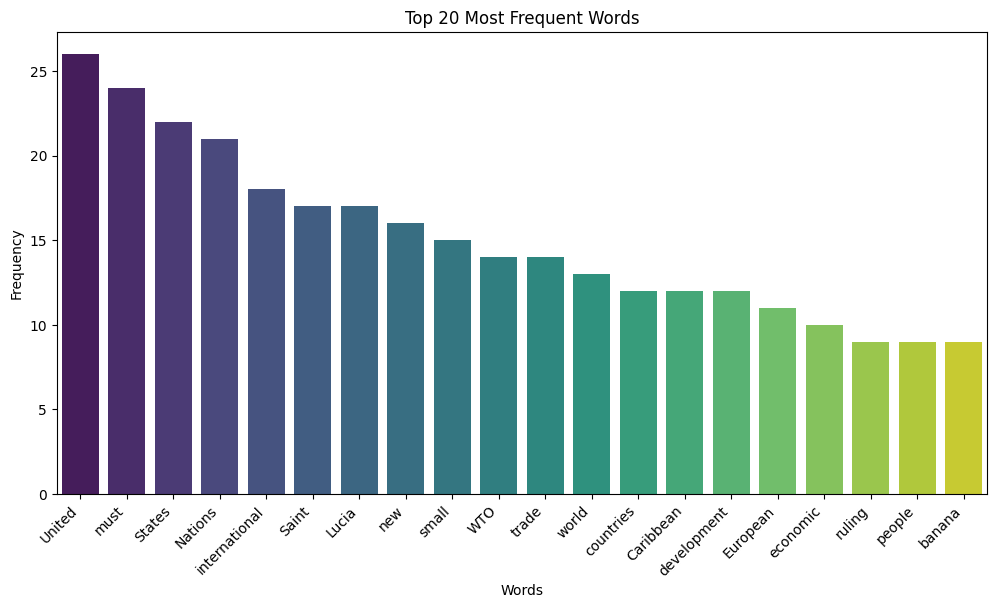

In [26]:
frequency_plot(cleaned_speech_2)

<b>Insight</b>

I implied that Mr. Kenny D. Anthony is an influence in economics development and international trade of United States from the word <i>WTO</i>. I am not quite sure what is the main product he trade between countries so, I implied from the bar charts that it is banana. After researched for his profile, he is a Saint Lucian politician who owns banana industry.

### 3. Teodoro Obiang Nguema Mbasogo
- Find Top 10

In [27]:
top10_words(cleaned_speech_3)

,Word,Frequency
67,world,18
80,political,18
121,human,13
12,United,13
154,must,12
81,economic,12
13,Nations,12
160,countries,11
178,development,11
104,peace,10


- Text Visualization

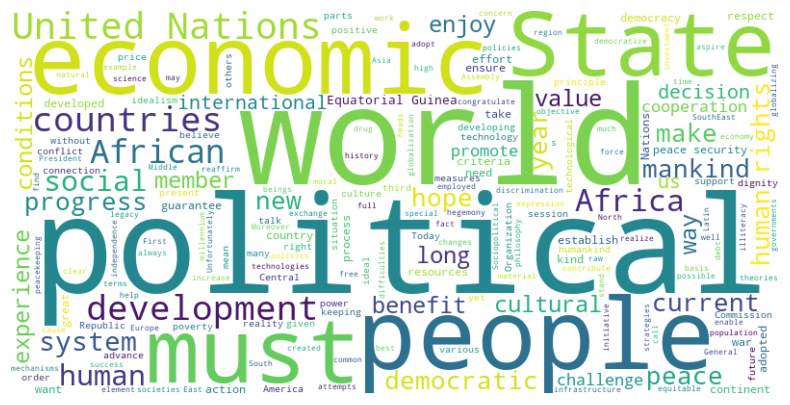

In [28]:
wordcloud_plot(cleaned_speech_3)

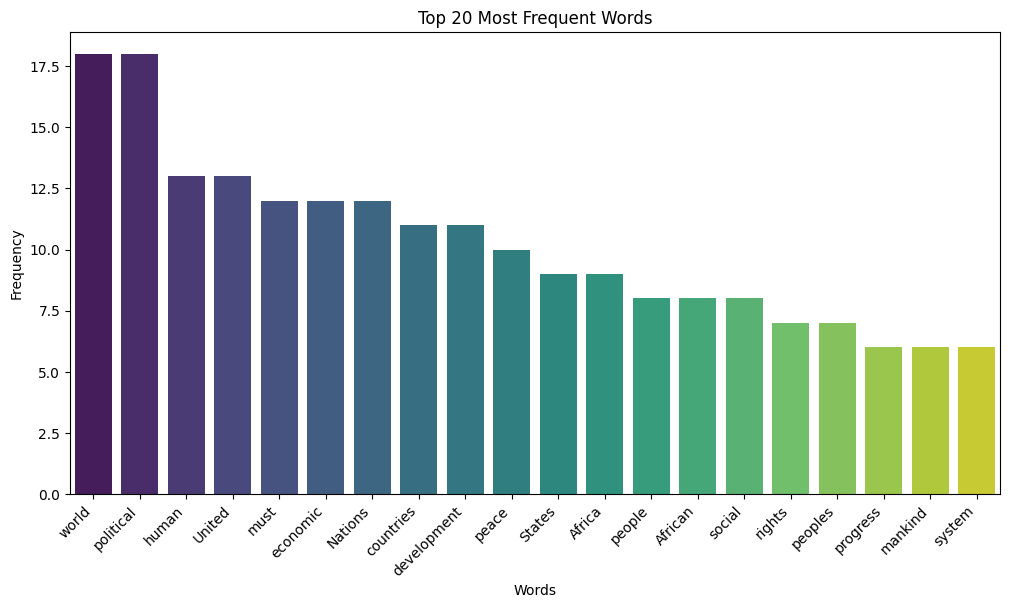

In [29]:
frequency_plot(cleaned_speech_3)

<b>Insight</b>

From the visualization, we can guess that Teodoro Obiang Nguema Mbasogo is an African politician who deals with the economic and peace but, I am not sure about <i>mankind</i> and <i>system</i> word. The insight I get from the visualization is close to Prince Norodom from my first chosen person. The information from wikipedia shows that he is Equatoguinean politician and dictator. 